## TOLNet
Authors: Maurice Roots, Arthur Perng

This notebook details how to use the TOLNet API to fetch and plot ozone data with various filters, such as processing type and instrument group/location. For more information on TOLNet, visit https://tolnet.larc.nasa.gov/




## Table of Contents:
* Overview
* Example Case Study
* Comparison with GEOS CF data
* Python package overview

## Overview <a class="anchor" id="tolnet_overview"></a>

Although vital in the stratosphere, ozone has long been recognized as an air pollutant near the Earth's surface, causing health problems for humans and vegetation at high concentrations. Tropospheric ozone is also a short-lived greenhouse gas impacting climate by contributing to the Earth's global warming. Despite significant regulatory efforts and pollution-control programs developed over the past 20 years in the most densely populated regions of the globe, recent reports of continuing free-tropospheric ozone increase, for example in the western United States, have triggered the need to enhance our tropospheric ozone observation capabilities to evaluate the tropospheric ozone measurements of spaceborne missions, such as TEMPO (Tropospheric Emissions: Monitoring of POllution; http://tempo.si.edu) or TROPOMI (TROPOspheric Monitoring Instrument, http://www.tropomi.eu/).



(Filler text here, replace with how it works)

Objectives of the Network (Through Routine Measurements and Joint Field Deployments)
- Provide high spatio-temporal observations of planetary boundary layer (PBL) and free tropospheric ozone for use by the satellite, regulatory, and scientific community.
- Study the character of the atmospheric structure that current and future satellites observe and assess the fidelity with which a geostationary instrument can measure that structure.
- Discover new structures and transport processes throughout the boundary layer and upper troposphere/lower stratosphere, especially in the diurnal and vertical variation.
- Foster use of these high-resolution ozone observations to improve and evaluate the processes in air-quality forecast and chemical transport models.
- Exploit synergy with existing ground-based networks such as the NASA Pandora project, NASA MPLNet, EPA ceilometer network, existing state regulatory monitors and other networks.
- Improve the community understanding of the relationship between ozone and aerosols aloft and surface ozone and PM values both during U.S. wildfire and long-range transport events.
- Advance our understanding of processes controlling regional background atmospheric composition (including stratospheric contribution and long-range transport) and their effect on surface air quality to prepare for the geostationary satellite era.

The following is a map of each instrument group's homebase.

In [23]:
%%capture
!pip install folium

In [24]:
import folium

stations = [
    {'name': 'ECCC', 'latitude': 57.184, 'longitude': -111.640},
    {'name': 'NASA GSFC', 'latitude': 38.99, 'longitude': -76.84},
    {'name': 'NOAA ESRL/CSL', 'latitude': 39.99, 'longitude': -105.26},
    {'name': 'UAH', 'latitude': 34.73, 'longitude': -86.65},
    {'name': 'CCNY', 'latitude': 40.821, 'longitude': -73.949},
    {'name': 'Hampton U', 'latitude': 37.02, 'longitude': -76.34},
    {'name': 'NASA JPL', 'latitude': 34.38, 'longitude': -117.68}
]
# Not included here: NASA JPL, NASA LaRC
# CCNY has no altitude listed

# Create a map centered around the average latitude and longitude of the stations
map_center = [sum(station['latitude'] for station in stations) / len(stations),
              sum(station['longitude'] for station in stations) / len(stations)]

homebase_map = folium.Map(location=map_center, zoom_start=5)

# Add markers for each station
lat_bounds = [None, None]
long_bounds = [None, None]
for station in stations:
    current_lat = station['latitude']
    current_long = station['longitude']

    #Get minimum and maximum latitudes to zoom the map appropriately
    if lat_bounds[0] == None or current_lat < lat_bounds[0]:
        lat_bounds[0] = current_lat
    if lat_bounds[1] == None or current_lat > lat_bounds[1]:
        lat_bounds[1] = current_lat
    if long_bounds[0] == None or current_long < long_bounds[0]:
        long_bounds[0] = current_long
    if long_bounds[1] == None or current_long > long_bounds[1]:
        long_bounds[1] = current_long
        
    folium.Marker(
        location=[station['latitude'], station['longitude']],
        popup=station['name'],
        tooltip=station['name']
    ).add_to(homebase_map)
homebase_map.fit_bounds([[lat_bounds[0], long_bounds[0]], [lat_bounds[1], long_bounds[1]]]) 

In [25]:
# Shows a map of each instrument group's homebase.
# You may need to trust this notebook by going to File -> Trust notebook to get it to show.
homebase_map

## Example Case Study  <a class="anchor" id="case_study"></a>

On July 12th, 2023, the air quality surrounding the Goddard Space Flight Center was particularly poor, with an ozone index of about 100(Unhealthy for sensitive groups).  
We will use the TOLNet API to graph the ozone data at GSFC during this time.  
First, we install the toolbox:

In [26]:
%%capture
!pip install git+https://github.com/moroots/TOLNET_DEMO

Then, we import it with python.

In [27]:
from TOLNET_DEMO.tolnet import TOLNet

We only want data from the GSFC area around June 12th. As such, we filter accordingly:

In [28]:
tolnet = TOLNet() # object that retrieves data from the API and stores it

date_start = "2023-07-11"
date_end = "2023-07-13"
group = [2] # List of instrument group IDs to filter by. We only want GSFC(ID=2), so this list only contains 2.
product_ID = [4] # Filter for igh-resolution files only

tolnet.import_data(min_date=date_start, max_date=date_end, instrument_group=group, )


 12%|██████████▌                                                                         | 1/8 [00:00<00:02,  3.25it/s]

Error processing file TOLNet-SurfaceObs_GSFC_20230713_R0.ict: 'value'
Error processing file TOLNet-SurfaceObs_GSFC_20230712_R0.ict: 'value'


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:01<00:00,  5.06it/s]

Error processing file TOLNet-SurfaceObs_GSFC_20230711_R0.ict: 'value'


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.37it/s]


Then, we plot the data. One curtain plot is created for each combination of instruent group and processing type, which is 2 in this case(GSFC In-house processed, GSFC centrally processed).

C:\Users\arthu\Documents\NASA\TOLNET_Summer\TOLNET_DEMO\tolnet.py:403: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data[key][filename] = self.data[key][filename].fillna(value=np.nan)


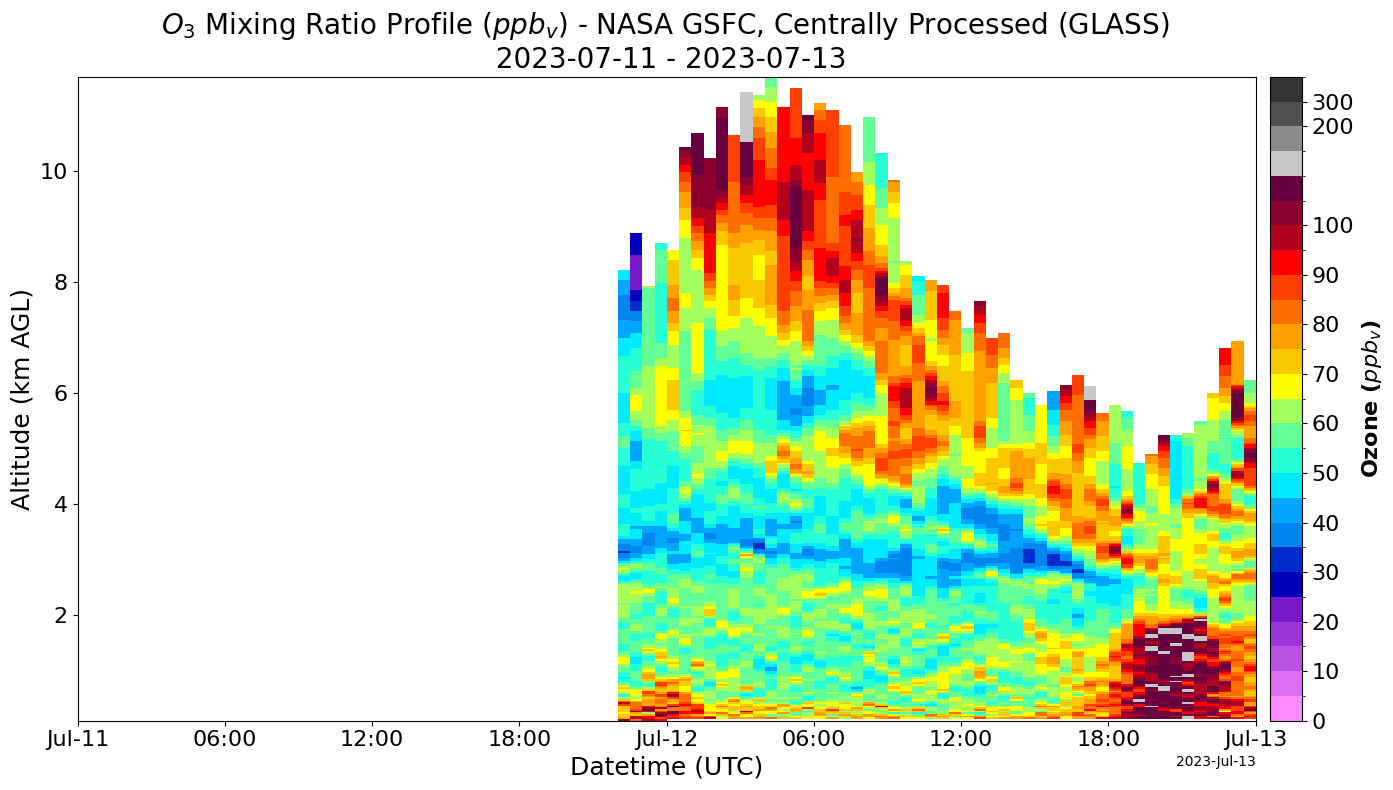

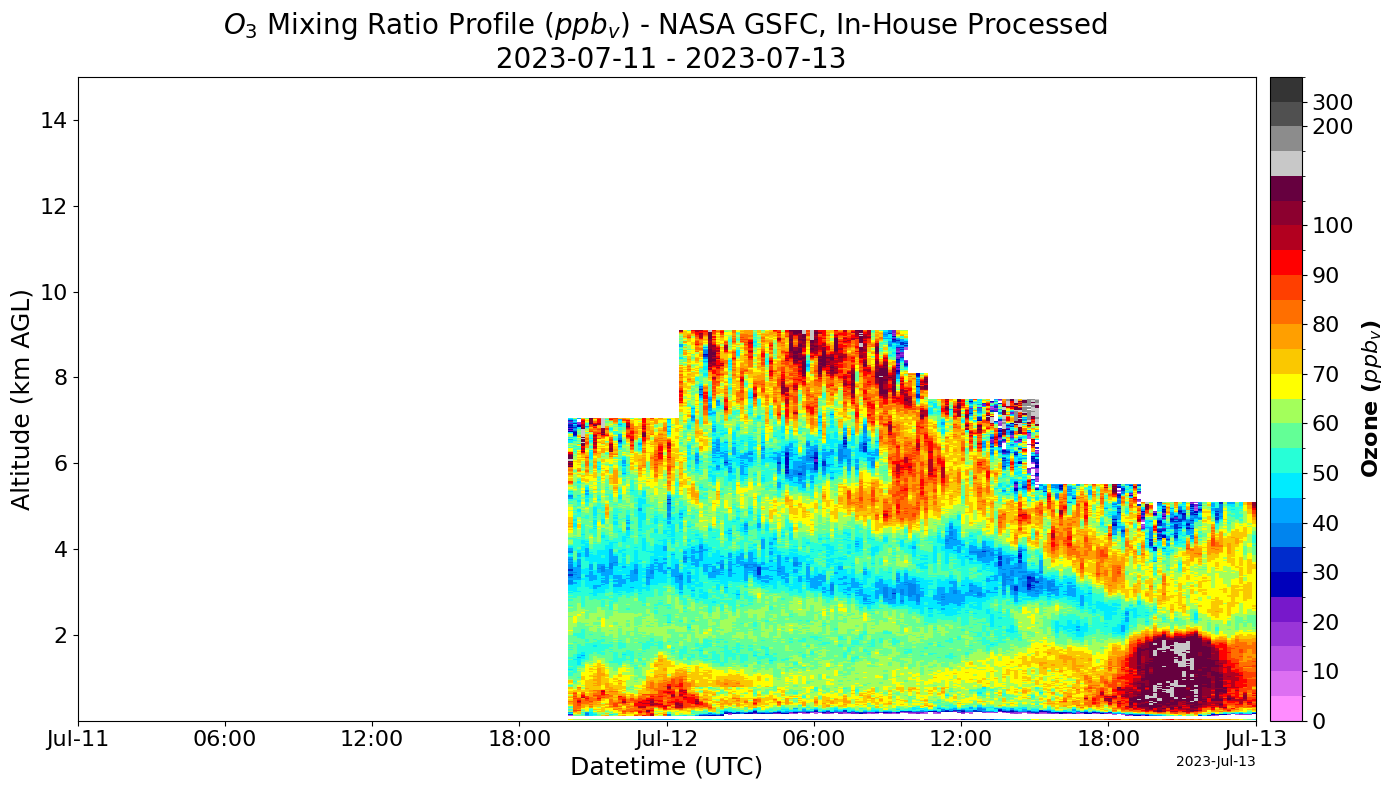

In [29]:
tolnet.tolnet_curtains()

We can see that there is a blob of dark red and gray on both graphs at around 6:00-12:00 PM on July 12th, signalling an ozone ppbv(parts per billion) of 100 or higher. (The EPA standard is 75 parts per billion. Any more is unhealthy.) This corresponds to the worsened air quality index on that day.

## Comparison with GEOS CF <a class="anchor" id="comparison_geos_cf"></a>
(WIP)

## Package Overview <a class="anchor" id="package_overview"></a>

In [30]:
%%capture
!pip install git+https://github.com/moroots/TOLNET_DEMO
# Installs the toolbox and makes it importable.
from TOLNET_DEMO.tolnet import TOLNet
tolnet = TOLNet() # tolnet now refers to an object that is capable of retrieving data from the API

In [31]:
# Prints querible parameters.
# tolnet.print_product_types()
# tolnet.print_processing_types()
tolnet.print_instrument_groups()
# tolnet.print_file_types()


 Instrument Groups:
 id instrument_group_name                                                                                description
  1                  ECCC                                  Environment and Climate Change Canada (mobile instrument)
  2             NASA GSFC                                       NASA Goddard Space Flight Center (mobile instrument)
  3        NASA JPL TMTOL                                     NASA Jet Propulsion Laboratory (stationary instrument)
  4             NASA LaRC                                           NASA Langley Research Center (mobile instrument)
  5         NOAA ESRL/CSL NOAA Earth System Research Laboratories - Chemical Sciences Laboratory (mobile instrument)
  6                   UAH                                    University of Alabama in Huntsville (mobile instrument)
  7       NASA JPL SMOL-1                                         NASA Jet Propulsion Laboratory (mobile instrument)
  8       NASA JPL SMOL-2                  

In [32]:
date_start = "2023-08-08"
date_end = "2023-08-11"
product_IDs = [4] # HIRES

# Fetches data using the TOLNet object. min_date and max_date are required, but other parameters are optional.
# Stores the data in the object, which can be accessed with tolnet.data and tolnet.meta_data.
# This will prompt the user for confirmation if the query would download every file from the API.
# Querible parameters are processing_type, instrument_group, product_type, and file_type. 
# All parameters require a list of IDs.
data = tolnet.import_data(min_date=date_start, max_date=date_end, product_type=product_IDs)


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:28<00:00,  1.78s/it]


C:\Users\arthu\Documents\NASA\TOLNET_Summer\TOLNET_DEMO\tolnet.py:403: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data[key][filename] = self.data[key][filename].fillna(value=np.nan)


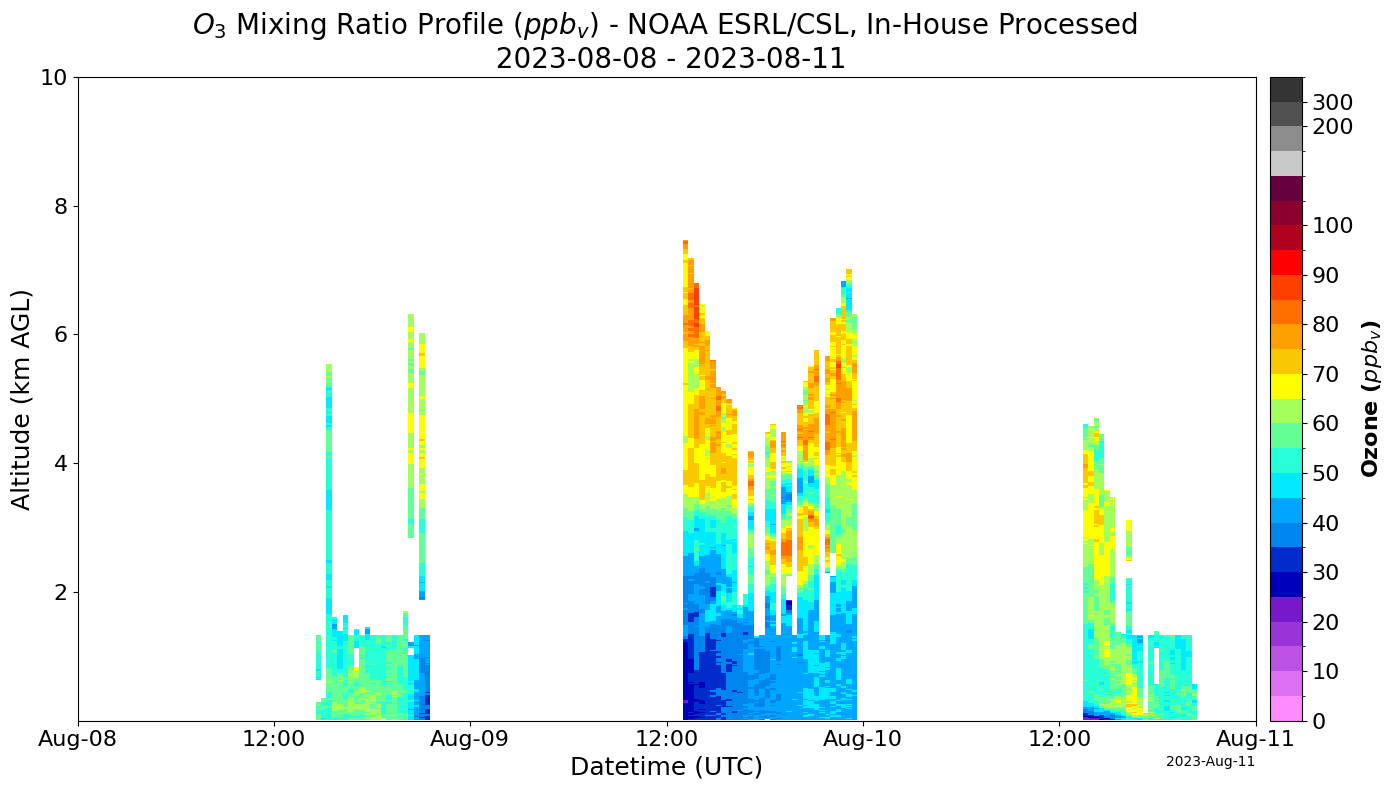

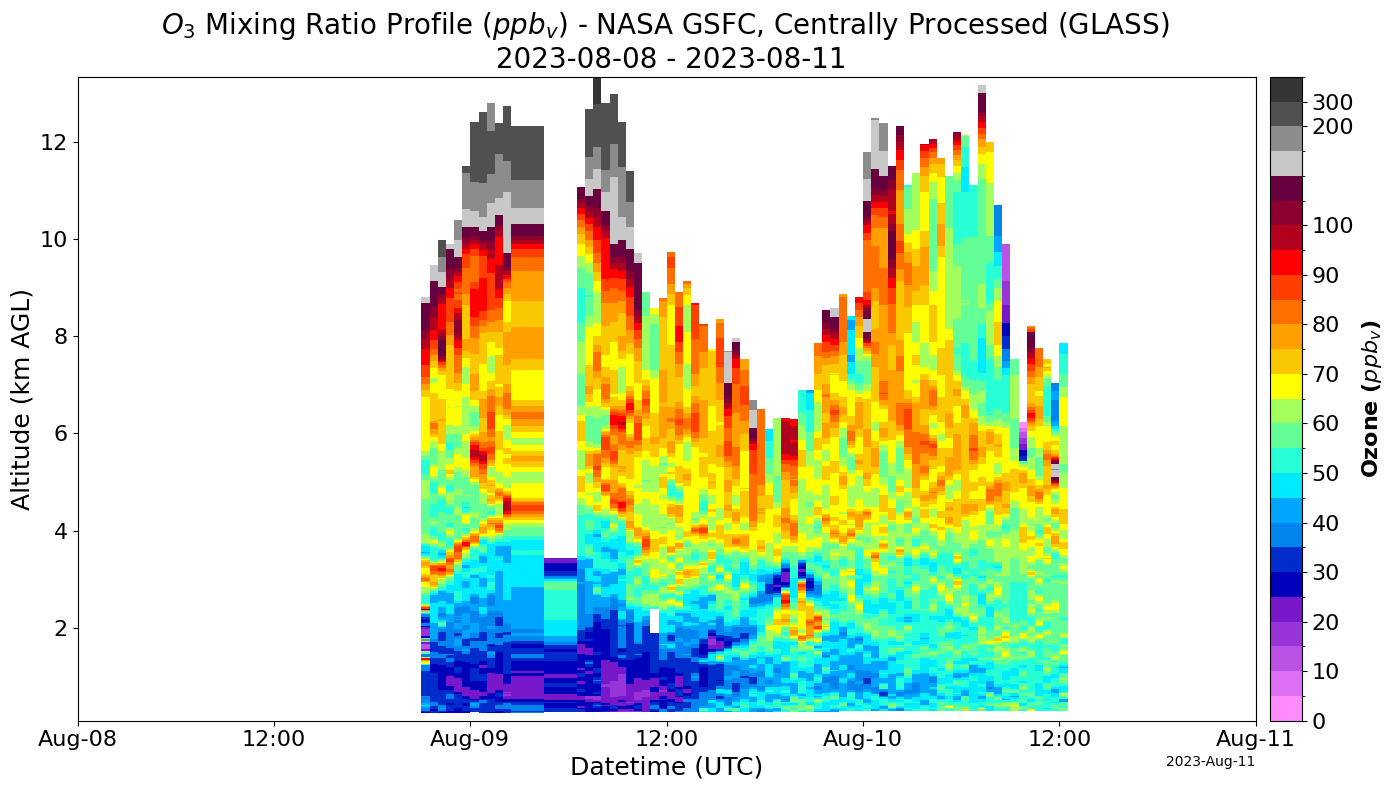

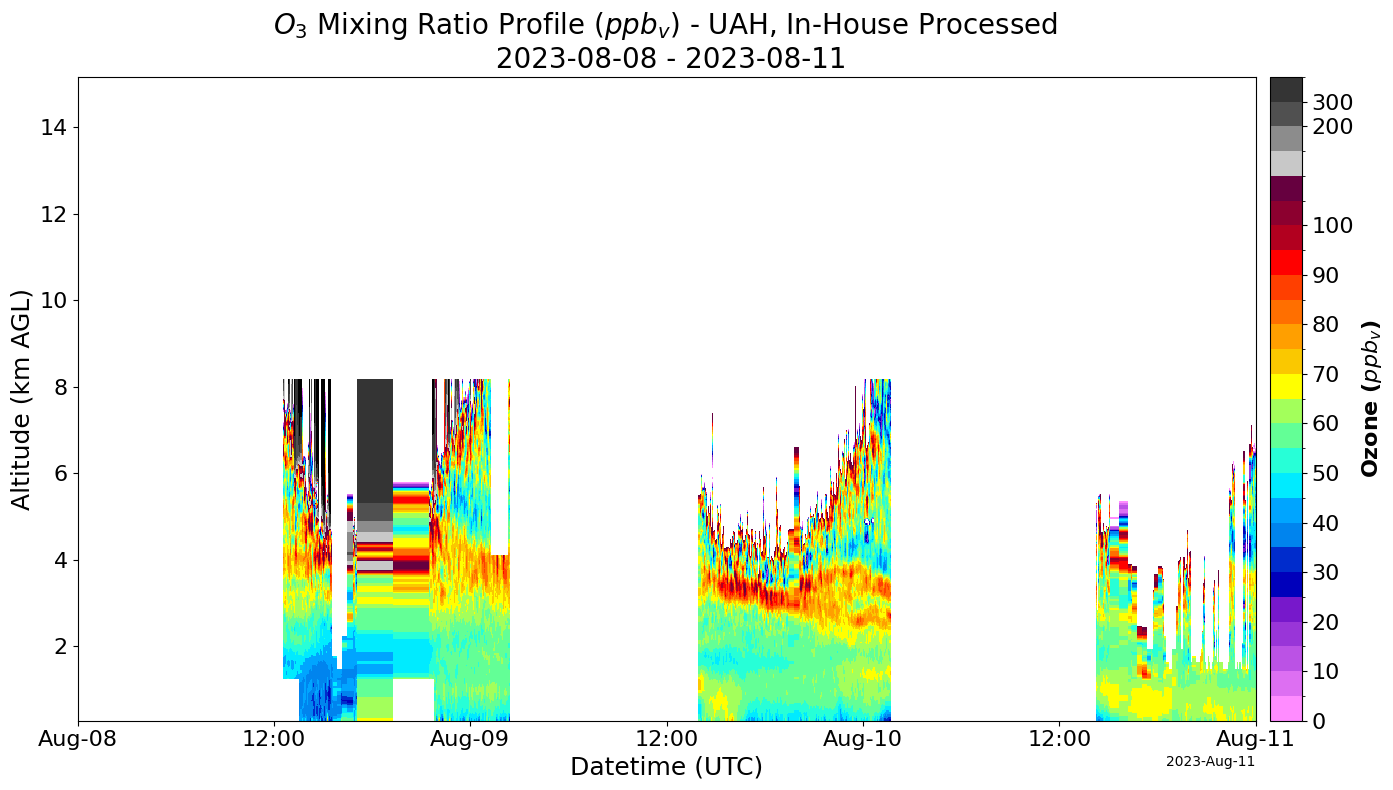

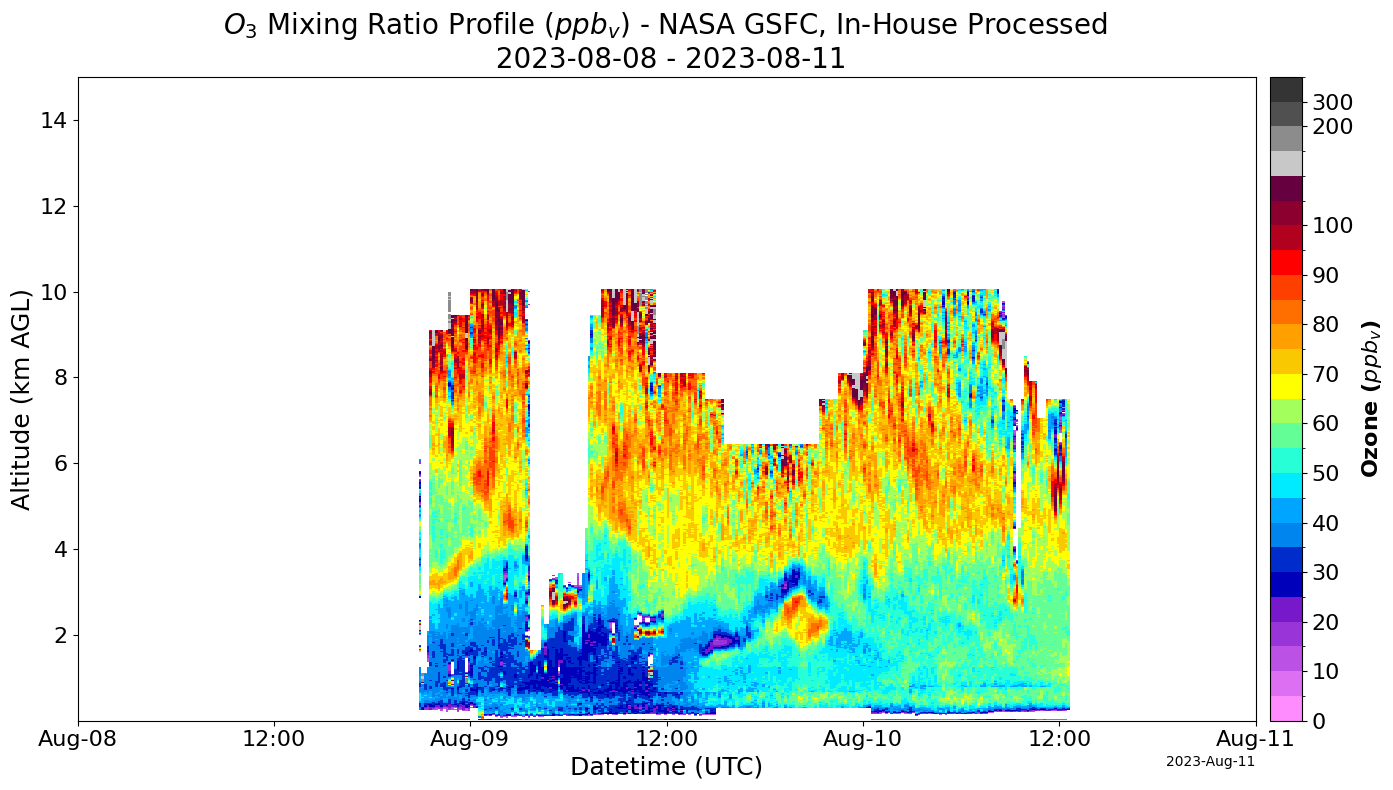

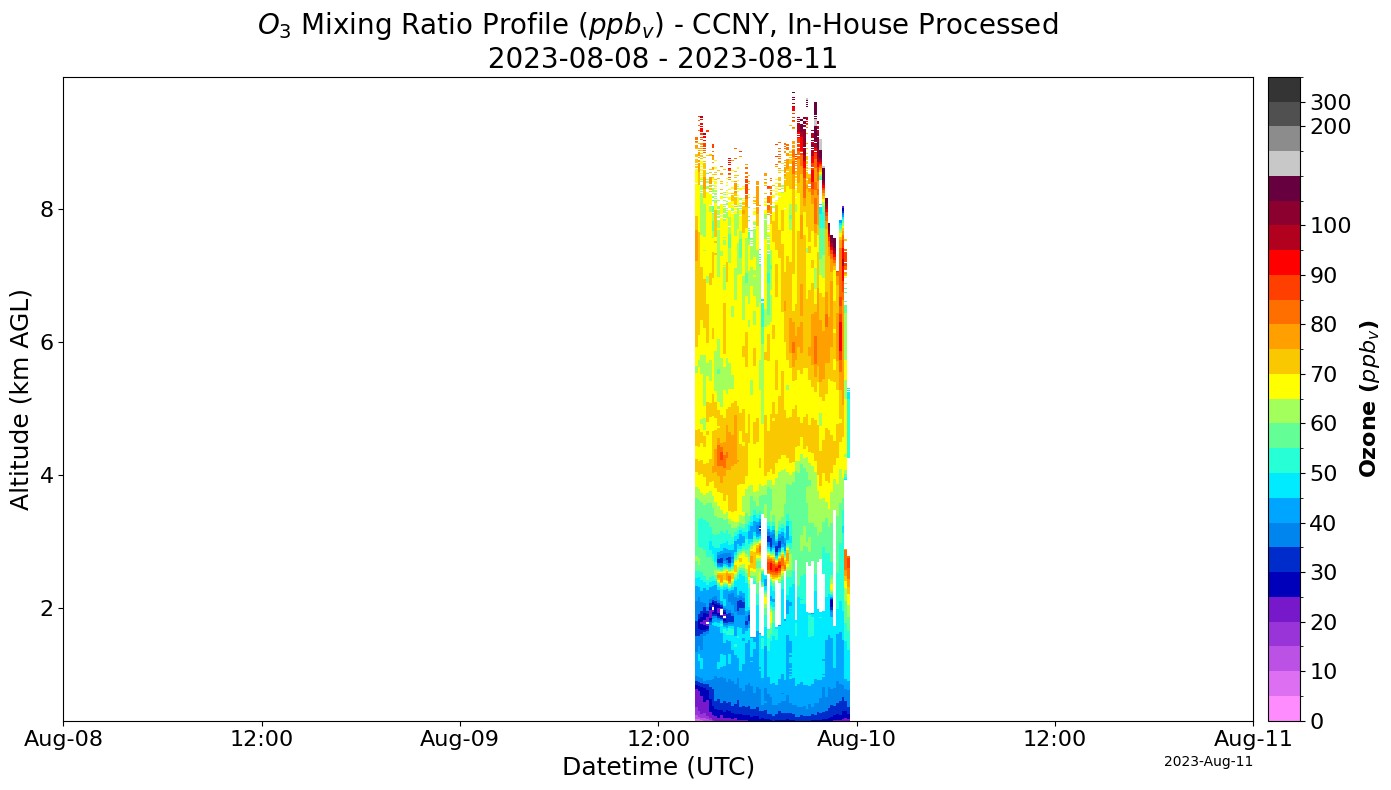

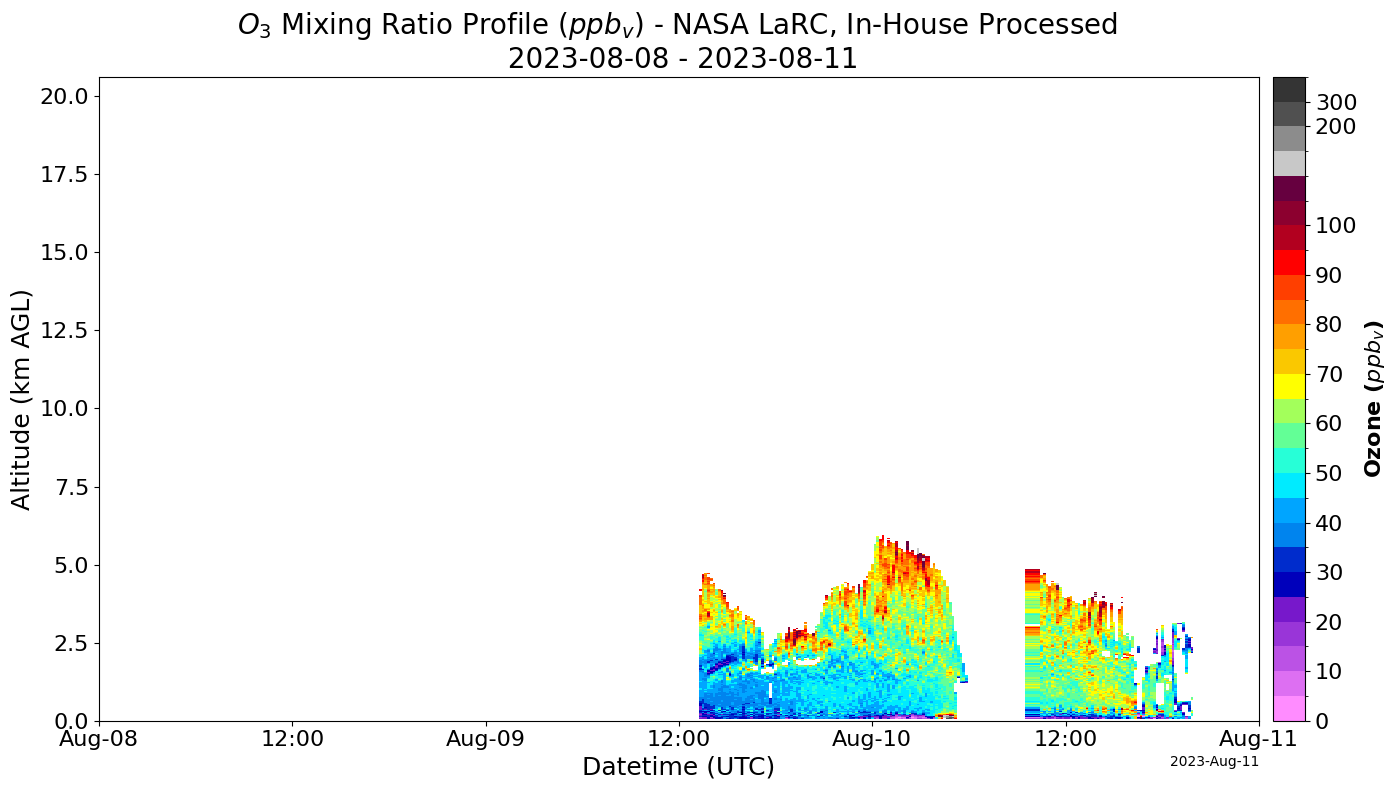

In [33]:
# Plots the data, used after import_data. Puts each combination of instrument group and processing type on a seperate plot.
data.tolnet_curtains()

### Plotting a specific lidar

In [34]:
from TOLNET_DEMO.tolnet import TOLNet
tolnet = TOLNet()

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:13<00:00,  1.69s/it]
C:\Users\arthu\Documents\NASA\TOLNET_Summer\TOLNET_DEMO\tolnet.py:403: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data[key][filename] = self.data[key][filename].fillna(value=np.nan)


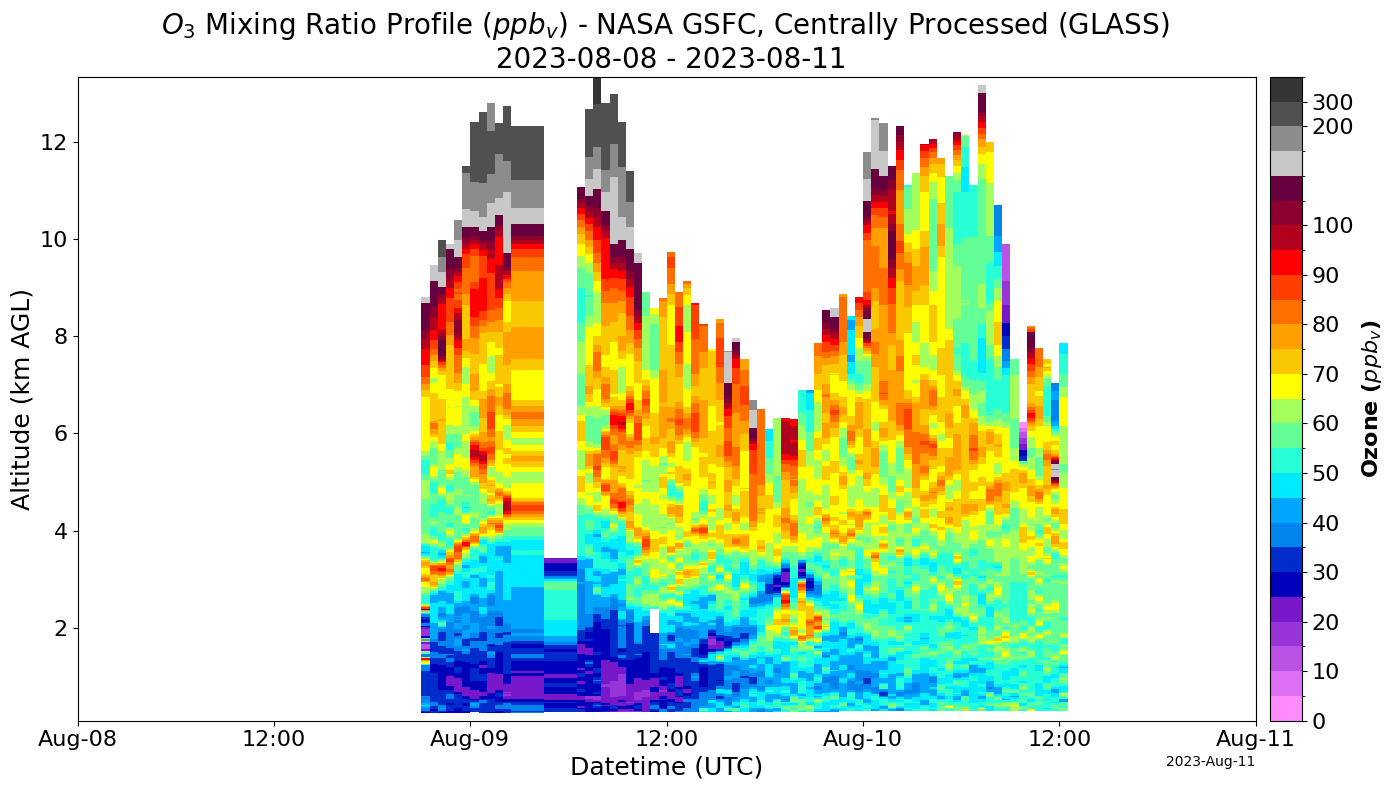

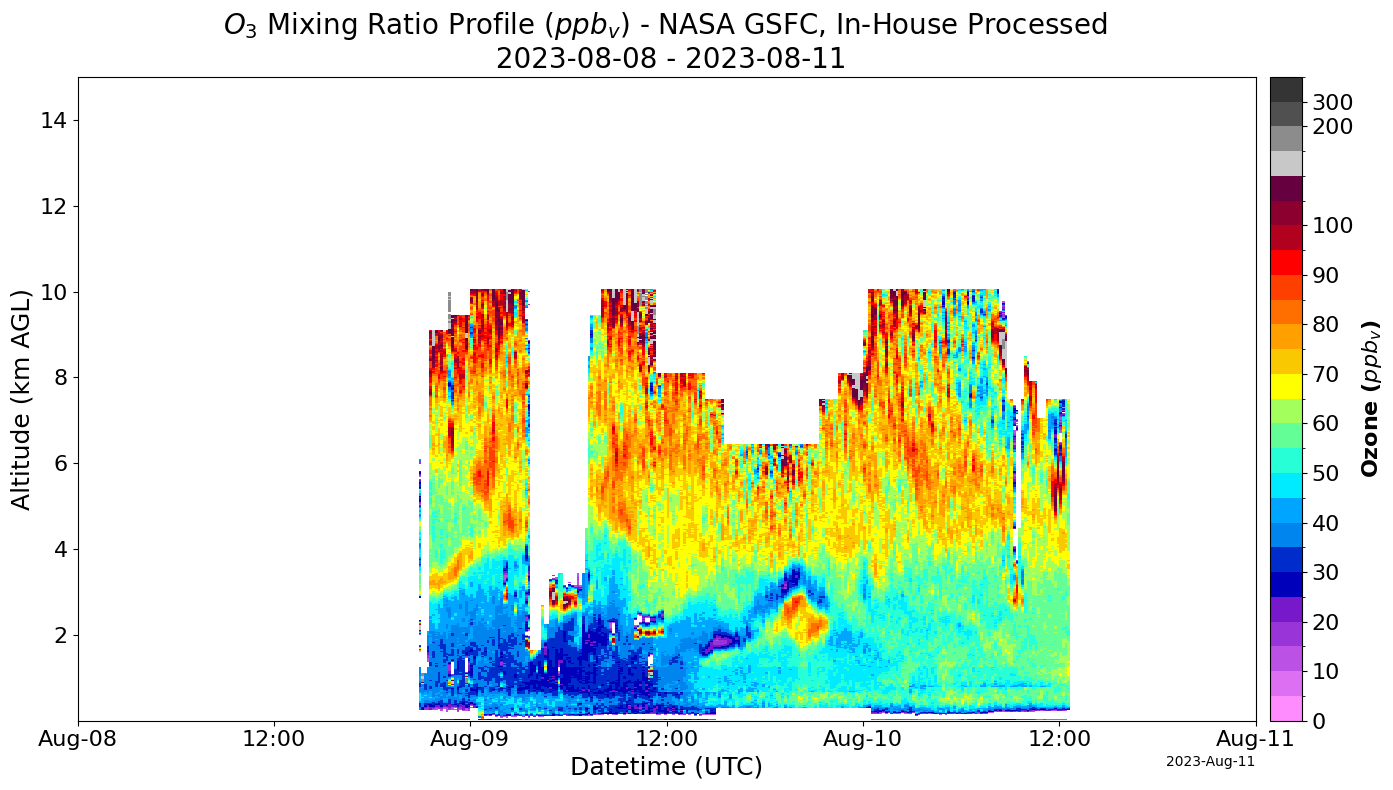

In [35]:
date_start = "2023-08-08"
date_end = "2023-08-11"
product_IDs = [4] # HIRES
lidar_group = [2] # NASA GSFC
data = tolnet.import_data(min_date=date_start, max_date=date_end, product_type=product_IDs, instrument_group=lidar_group)
data.tolnet_curtains()

### Additional parameters for plotting

Additional parameters can be used: title, ylabel, xlabel(axis labels), xlims, ylims, yticks, surface, sonde, and savefig.  
title, ylabel, and xlabel take strings.  
xlims takes a list of two dates in ISO 8601 Format(YYYY-MM-DD), like this: ['2023-08-05', '2023-08-08'].  
surface and Sonde plot their respective datas instead.  
savefig=True saves each figure to a file. Each each figure is saved in a file named (Instrument Group)\_(Processing type)\_(Start date)_(End date).png.

### Accessing data directly

In [42]:
# The data can also be accessed directly from the object.
tolnet.data.keys() # Returns each combination of instrument group and processing type that there is data for.



dict_keys(['dates', ('NASA GSFC', 'Centrally Processed (GLASS)'), ('NASA GSFC', 'In-House Processed')])

In [43]:
sample_key = list(tolnet.data.keys())[-1] # sample_key is now a tuple containing a combination of instrument group and processing type
tolnet.data[sample_key].keys() # Returns each filename with the specified group and type.




dict_keys(['groundbased_lidar.o3_nasa.gsfc003_hires_oldfield.ny_20230811t000000z_20230812t000000z_001.hdf', 'groundbased_lidar.o3_nasa.gsfc003_hires_oldfield.ny_20230810t000000z_20230811t000000z_001.hdf', 'groundbased_lidar.o3_nasa.gsfc003_hires_oldfield.ny_20230809t000000z_20230810t000000z_001.hdf', 'groundbased_lidar.o3_nasa.gsfc003_hires_oldfield.ny_20230808t000000z_20230809t000000z_001.hdf', 'groundbased_lidar.o3_nasa.gsfc003_hires_oldfield.ny_20230807t000000z_20230808t000000z_001.hdf'])

In [44]:
sample_file = list(tolnet.data[sample_key].keys())[0]
tolnet.data[sample_key][sample_file] # Returns a DataFrame containing the data for that file.

,0.0105,0.0255,0.0405,0.0555,0.0705,0.0855,0.1005,0.1155,0.1305,0.1455,...,14.8605,14.8755,14.8905,14.9055,14.9205,14.9355,14.9505,14.9655,14.9805,14.9955
2023-08-11 00:05:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-11 00:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-11 00:25:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-11 00:35:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-11 00:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-11 23:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-11 23:25:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-11 23:35:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-11 23:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
tolnet.meta_data[sample_key][sample_file].keys() # Returns a dictionary containing that file's metadata.
metadata = tolnet.meta_data[sample_key][sample_file]

# Remove the data section so that only the metadata is printed, not all of the data which floods the output
if 'data' in metadata['value']:
    del metadata['value']['data']
if 'data' in metadata['altitude']:
    del metadata['altitude']['data'] 
    
metadata

{'fileInfo': {'file_name': 'groundbased_lidar.o3_nasa.gsfc003_hires_oldfield.ny_20230811t000000z_20230812t000000z_001.hdf',
  'file_size': 6390365,
  'isAccessible': True,
  'start_data_date': '2023-08-11 00:00:00',
  'end_data_date': '2023-08-12 00:00:00',
  'upload_date': '2023-11-06 12:17:01.427677',
  'instrument_group_name': 'NASA GSFC',
  'instrument_latitude': 40.964,
  'instrument_longitude': -73.14,
  'instrument_altitude': 3,
  'doi': '10.5067/Lidar/Ozone/TOLNet/NASA-GSFC',
  'citation_url': 'https://asdc.larc.nasa.gov/project/TOLNet/TOLNet_GSFC_Data_1/citation',
  'product_type_name': 'HIRES',
  'processing_type_name': 'In-House Processed',
  'file_type_name': 'HDF GEOMS (Standard)',
  'revision': 1,
  'near_real_time': 'f'},
 'altitude': {'attributes': {'VAR_DESCRIPTION': 'Altitude above sea level (km)',
   'VAR_VALID_MIN': -0.3,
   'VAR_VALID_MAX': 120,
   'VAR_UNITS': 'km',
   'VAR_FILL_VALUE': -999}},
 'datetime': {'attributes': {'VAR_DESCRIPTION': 'Weighted datetime of 

# Testbed

In [56]:
import requests
import pandas as pd
import numpy as np
def get_files_list():
    """
    Parameters
    ----------
    min_date : STR
        The starting date for the query, in YYYY-MM-DD format.
    max_date : STR
        The ending date for the query, in YYYY-MM-DD format.

    Returns
    -------
    A DataFrame containing all files from the TOLNet API that fall between the two provided dates.
    The DataFrame contains each file name as well as various descriptors.
    """
    dtypes = {"row": "int16",
             "count": "int16",
             "id": "int16",
             "file_name": "str",
             "file_server_location": "str",
             "author": "str",
             "instrument_group_id": "int16",
             "product_type_id": "int16",
             "file_type_id":"int16",
             "start_data_date": "datetime64[ns]",
             "end_data_date":"datetime64[ns]",
             "upload_date":"datetime64[ns]",
             "public": "bool",
             "instrument_group_name": "str",
             "folder_name": "str",
             "current_pi": "str",
             "doi": "str",
             "citation_url": "str",
             "product_type_name": "str",
             "processing_type_name": "str",
             "file_type_name": "str",
             "revision": "int16",
             "near_real_time": "str",
             "file_size": "int16",
             "latitude": "float16",
             "longitude": "float16",
             "altitude": "int16",
             "isAccessible": "bool"
             }

    i = 1
    url = f"https://tolnet.larc.nasa.gov/api/data/1?&order=data_date&order_direction=desc"
    response = requests.get(url)
    data_frames = []
    while response.status_code == 200:
        data_frames.append(pd.DataFrame(response.json()))
        i += 1
        url = f"https://tolnet.larc.nasa.gov/api/data/{i}?&order=data_date&order_direction=desc"
        response = requests.get(url)
        """
        if i % 10 == 0:
            print(i)
            """

    df = pd.concat(data_frames, ignore_index=True)
    df["start_data_date"] = pd.to_datetime(df["start_data_date"])
    df["end_data_date"] = pd.to_datetime(df["end_data_date"])
    df["upload_date"] = pd.to_datetime(df["upload_date"])
    return df.astype(dtypes)


In [57]:
all_files = get_files_list()

In [58]:
all_files['lat_long'] = [f"{all_files['latitude'].iloc[i]}_{all_files['longitude'].iloc[i]}" for i in range(len(all_files))]

In [59]:
unique_latlong = np.array(pd.unique(all_files['lat_long']))
#all_files['lat_long']


In [60]:
unique_latlong
lats, longs = [], []
for line in unique_latlong:
    lats.append(float(line.split('_')[0]))
    longs.append(float(line.split('_')[1]))

In [61]:
from pathlib import Path

In [62]:
states = geopandas.read_file(Path(r"..\ne_110m_admin_1_states_provinces\ne_110m_admin_1_states_provinces.shp"))

In [63]:
import geopandas, geodatasets
import pandas
import matplotlib.pyplot as plt

In [64]:
earth = geopandas.read_file(geodatasets.get_path("naturalearth.land"))

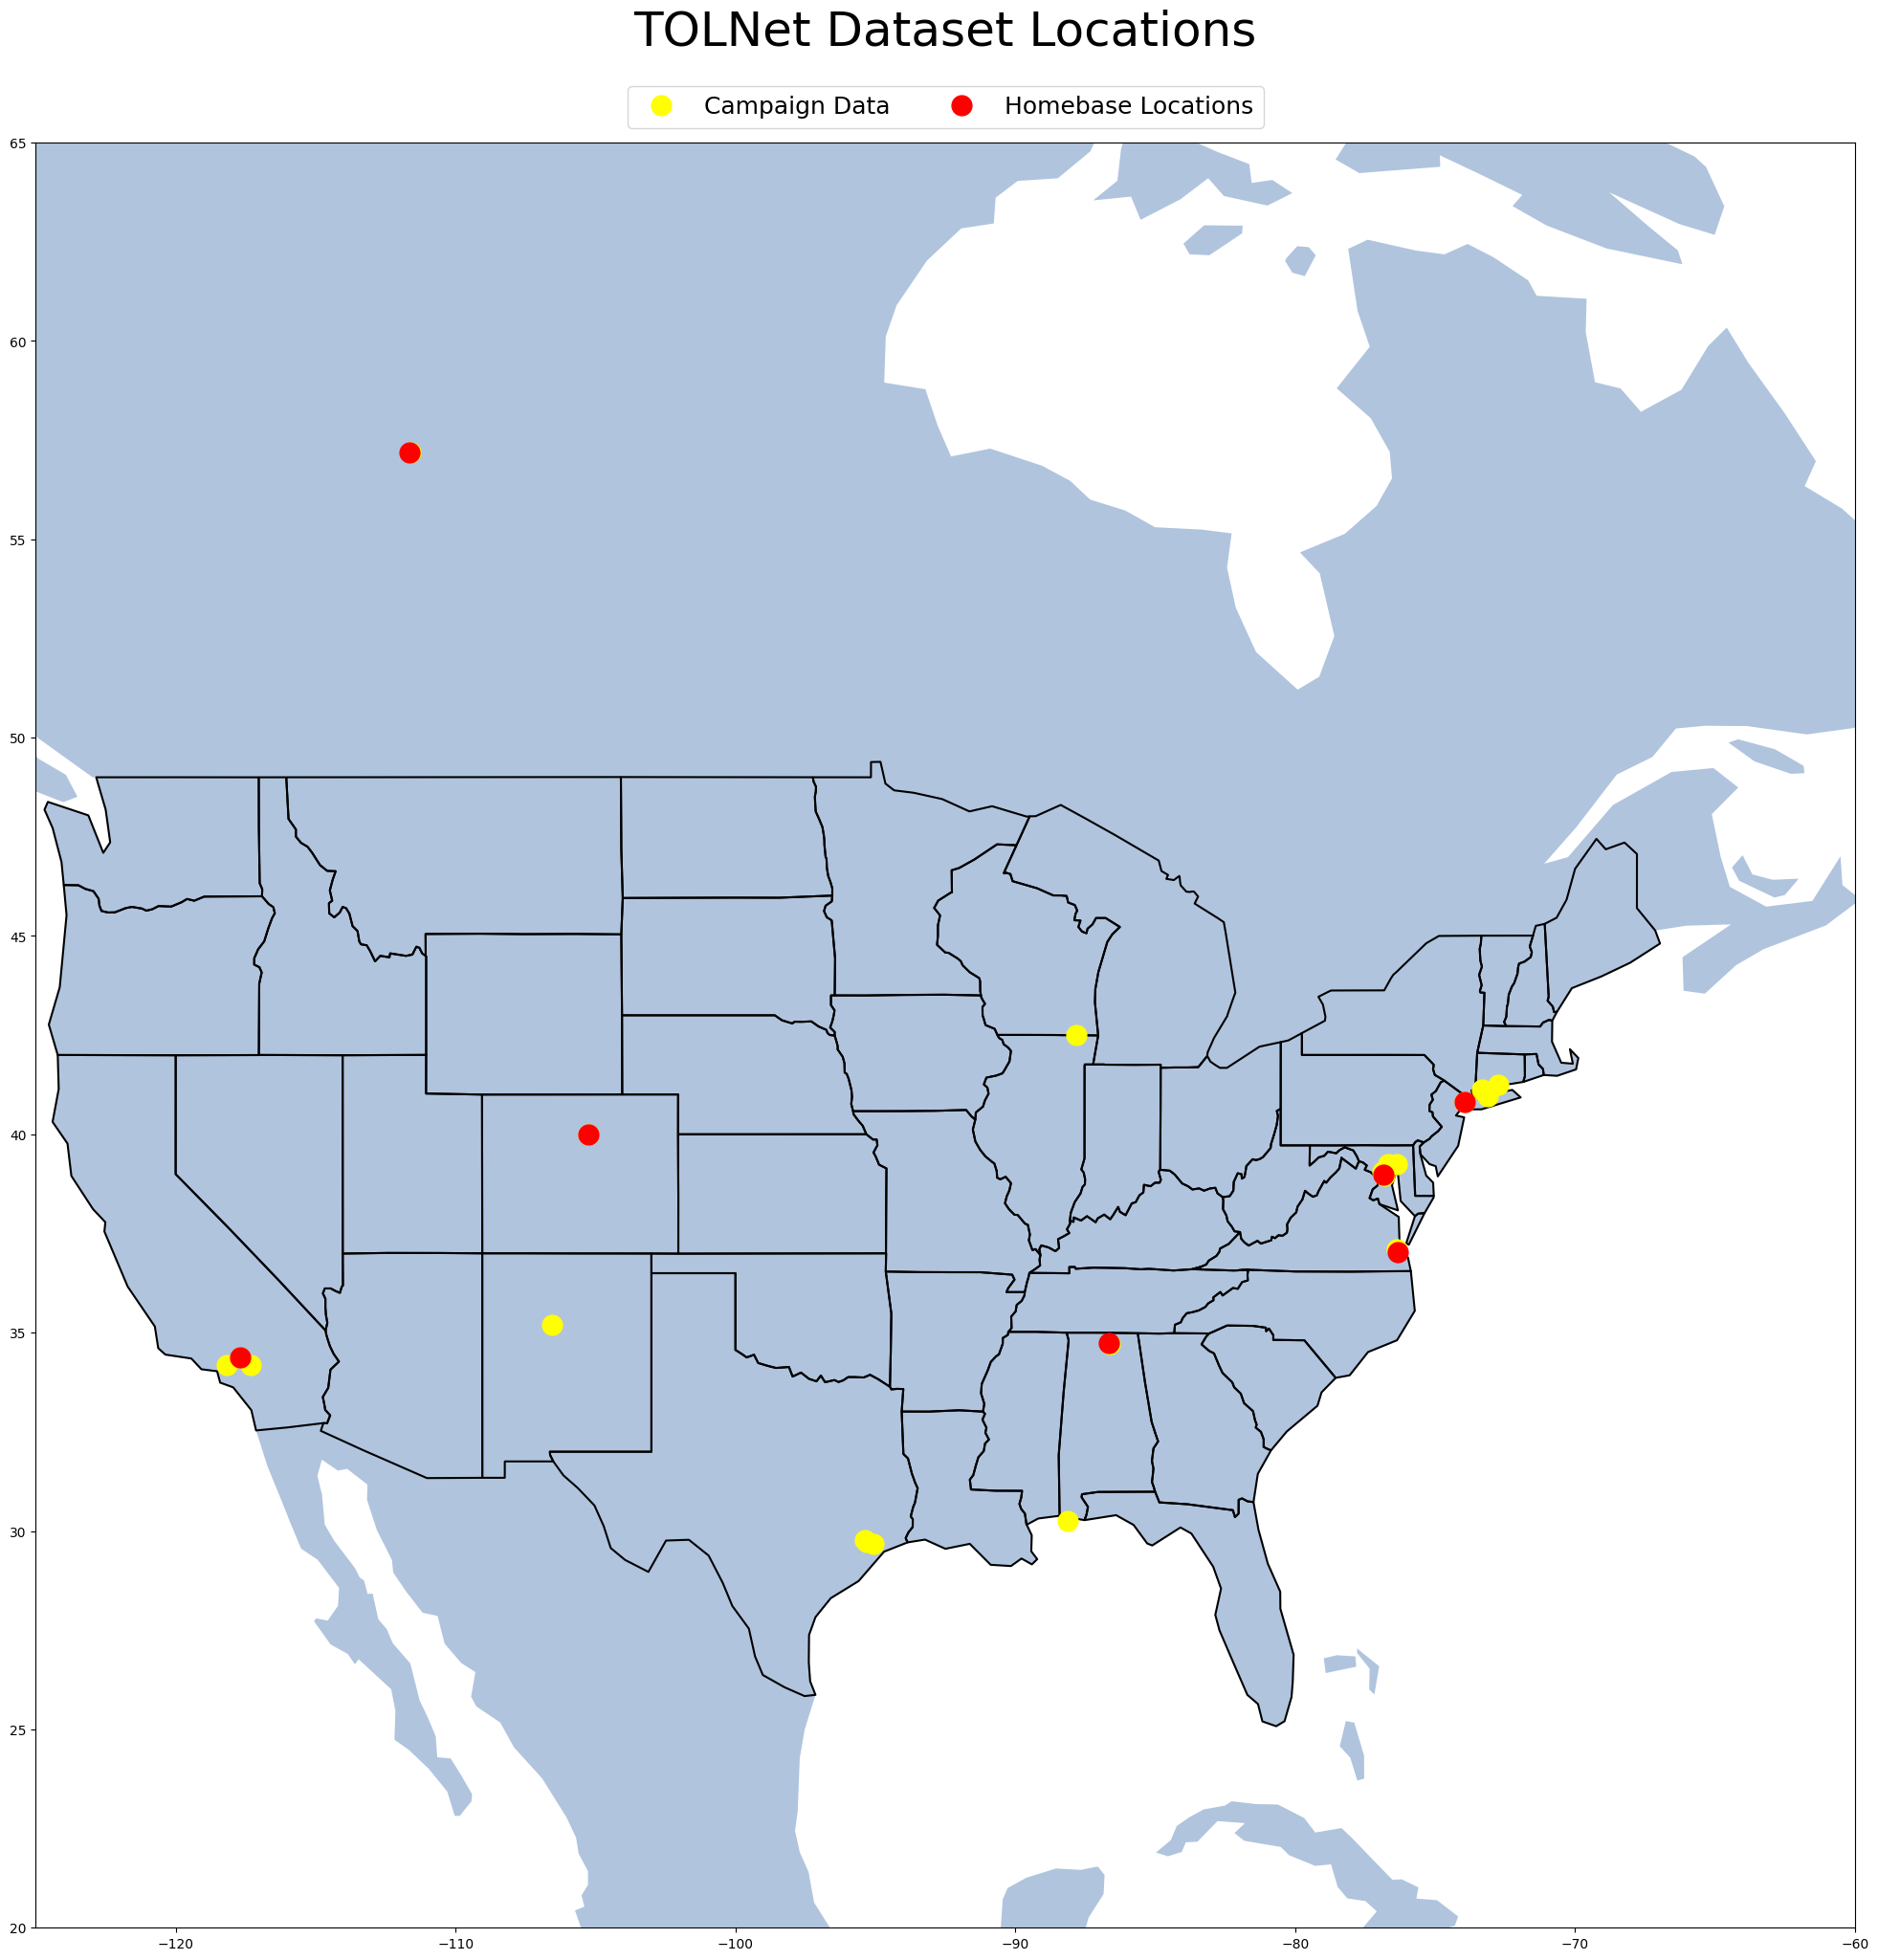

[-125, -60] [20, 65]


In [65]:
# Fix later: axes fontsize, state/country lines
# xlims, ylims = [-117.68, -73.949], [34.38, 57.184]
xlims, ylims = [-125, -60], [20, 65]

stations = [
    {'name': 'ECCC', 'latitude': 57.184, 'longitude': -111.640},
    {'name': 'NASA GSFC', 'latitude': 38.99, 'longitude': -76.84},
    {'name': 'NOAA ESRL/CSL', 'latitude': 39.99, 'longitude': -105.26},
    {'name': 'UAH', 'latitude': 34.73, 'longitude': -86.65},
    {'name': 'CCNY', 'latitude': 40.821, 'longitude': -73.949},
    {'name': 'Hampton U', 'latitude': 37.02, 'longitude': -76.34},
    {'name': 'NASA JPL', 'latitude': 34.38, 'longitude': -117.68}]

homebases = pandas.DataFrame(stations)
fig, ax = plt.subplots(figsize=(20, 20), layout="tight")
plt.title("TOLNet Dataset Locations", fontsize=36, loc="center", y=1.05)
earth.plot(ax=ax, color="lightsteelblue")
states.boundary.plot(ax=ax, color="black")
plt.plot(longs, lats, "o", color="yellow", markersize=15, label="Campaign Data")
plt.plot(homebases['longitude'], homebases['latitude'], "o", color="red", markersize=15, label="Homebase Locations")

plt.ylim(ylims)
plt.xlim(xlims)
ax.legend(ncols=2, bbox_to_anchor=(0.5, 1.02), loc="center", fontsize=18)
plt.show()
print(xlims, ylims)
